In [1]:
!pip install datasets
!pip install wordcloud


  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/09/7e/fd4d6441a541dba61d0acb3c1fd5df53214c2e9033854e837a99dd9e0793/datasets-2.14.5-py3-none-any.whl.metadata
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/46/14/0302669d5d983ce23dc3870f4f2b16ab1d757a1d7e54a5cfe7a5df37f8e2/xxhash-3.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/e7/41/96ac938770ba6e7d5ae1d8c9cafebac54b413549042c6260f0d0a6ec6622/multiprocess-0.70.15-py311-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0.0,>=0.14.0 from https://files.pythonhosted.org/packages/72/21/51cddb8850ed3f4dbc21e57c3dabc49e64d5577857ddda7b2eb0ffc2ec0e/huggingface_hub-0.17.2-py3-none-any.whl.metadata
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f5/3a/74a29b11cf2cdfcd6ba89c0cecd70b37cd1ba7b

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

In [4]:
dataset = load_dataset("olivierdehaene/xkcd")

In [5]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [6]:
dataset.keys()

dict_keys(['train'])

In [27]:
samples = dataset['train']

In [28]:
num_samples = len(samples)
print("Number of samples in the train split:", num_samples)


Number of samples in the train split: 2630


In [247]:
print("Sample data:")
samples[0]  # Replace 0 with the index of the sample you want to inspect



Sample data:


{'id': 1,
 'title': 'Barrel - Part 1',
 'image_title': 'Barrel - Part 1',
 'url': 'https://www.xkcd.com/1',
 'image_url': 'https://imgs.xkcd.com/comics/barrel_cropped_(1).jpg',
 'explained_url': 'https://www.explainxkcd.com/wiki/index.php/1:_Barrel_-_Part_1',
 'transcript': "[A boy sits in a barrel which is floating in an ocean.] Boy: i wonder where i'll float next?\n[A smaller frame with a zoom out of the boy in the barrel seen from afar. The barrel drifts into the distance. Nothing else can be seen.]\n",
 'explanation': 'The comic shows a young boy floating in a barrel in an ocean that doesn\'t have a visible end. It comments on the unlikely optimism and perhaps naïveté people sometimes display. The boy is completely lost and seems hopelessly alone, without any plan or control of the situation. Yet, rather than afraid or worried, he is instead quietly curious: "I wonder where I\'ll float next?"  Although not necessarily the situation in this comic, this is a behavior people often exh

# Analyze Titles and Themes

In [21]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zunai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zunai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
df = pd.DataFrame(samples)
df['title'] = df['title'].astype(str)
all_titles = ' '.join(df['title'])
tokens = nltk.word_tokenize(all_titles)
#filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
word_freq = Counter(filtered_tokens)
#get the most common words and their frequencies
most_common_words = word_freq.most_common(20)
print(most_common_words)

[('part', 28), ('2', 27), ('time', 24), ('map', 17), ('phone', 17), ('new', 14), ('xkcd', 13), ('code', 13), ('christmas', 12), ('3', 11), ('week', 11), ('names', 11), ('bad', 11), ('system', 11), ('solar', 10), ('game', 10), ('data', 10), ('problems', 10), ('star', 10), ('1', 9)]


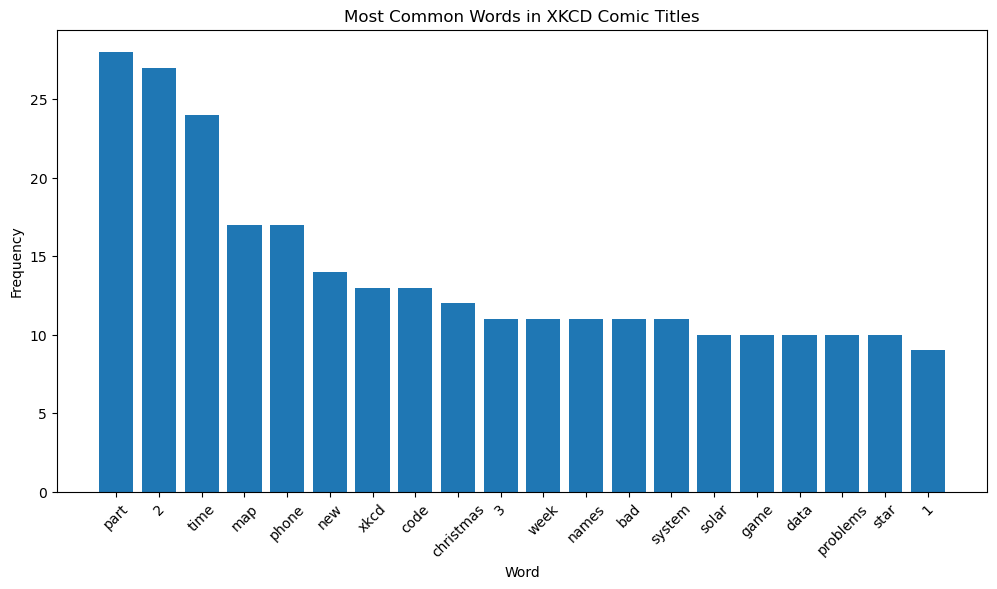

In [104]:
# Plot a bar chart of the most common words
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_words))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in XKCD Comic Titles')
plt.xticks(rotation=45)
plt.show()

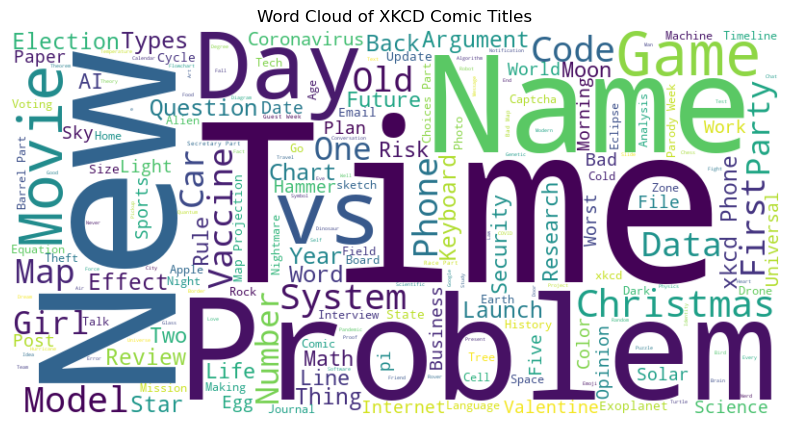

In [245]:
# Create a word cloud to visualize the recurring themes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of XKCD Comic Titles')
plt.show()

# Visual analysis

In [239]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def explore_comics(samples, title=""):

    # Load the XKCD dataset into a Pandas DataFrame
    df = pd.DataFrame(samples)

    # Ensure that the 'image_url' column contains URLs to the comic images
    df['image_url'] = df['image_url'].astype(str)

    # Filter samples by title if a title is provided
    if title:
        df = df[df['title'].str.contains(title, case=False, na=False)]

    
    # Define the number of rows and columns in the grid
    num_rows = 2
    num_cols = 3

    # Define the number of comic images to display
    num_images_to_display = num_rows * num_cols

    # Randomly select comic images
    random_indices = random.sample(range(len(df)), num_images_to_display)
    selected_comics = df.iloc[random_indices]

    # Create a subplot grid for displaying comic images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Iterate through selected comics and display the images
    for i, (_, comic) in enumerate(selected_comics.iterrows()):
        image_url = comic['image_url']

        # Download the image from the URL
        response = requests.get(image_url)

        if response.status_code == 200:
            # Open the image from the downloaded content
            image = Image.open(BytesIO(response.content))

            # Display the image in the current subplot
            row_index = i // num_cols
            col_index = i % num_cols
            axes[row_index, col_index].imshow(image)
            axes[row_index, col_index].axis('off')
        else:
            print(f"Failed to download image from URL: {image_url}")


    # Set a common title for the subplot grid
    plt.suptitle('Randomly Selected XKCD Comics')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


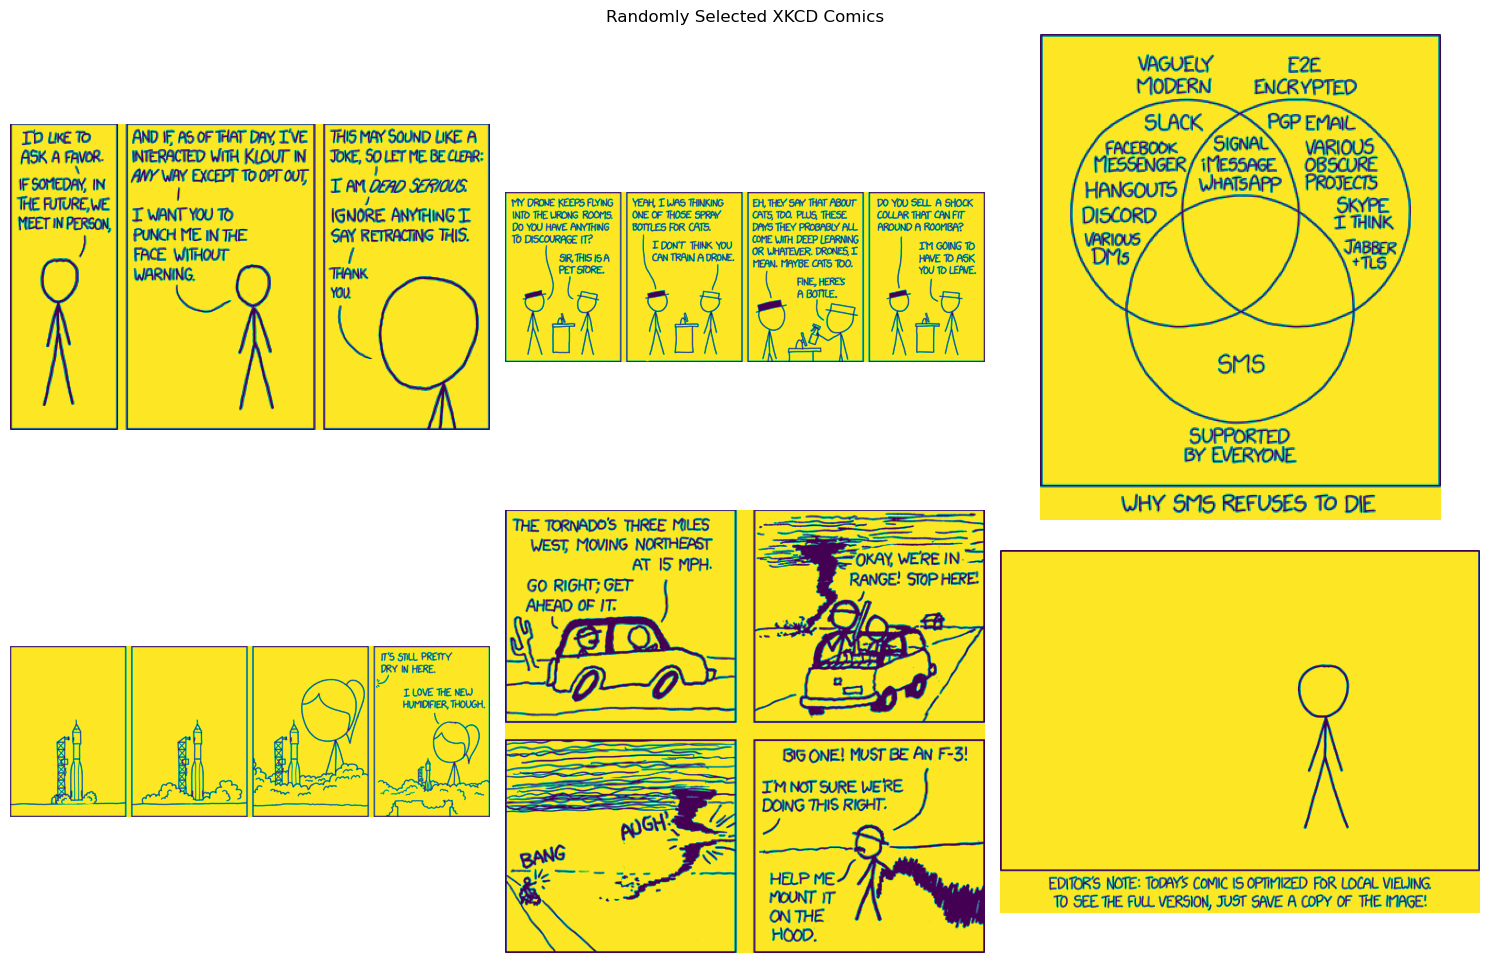

In [240]:
explore_comics(samples)

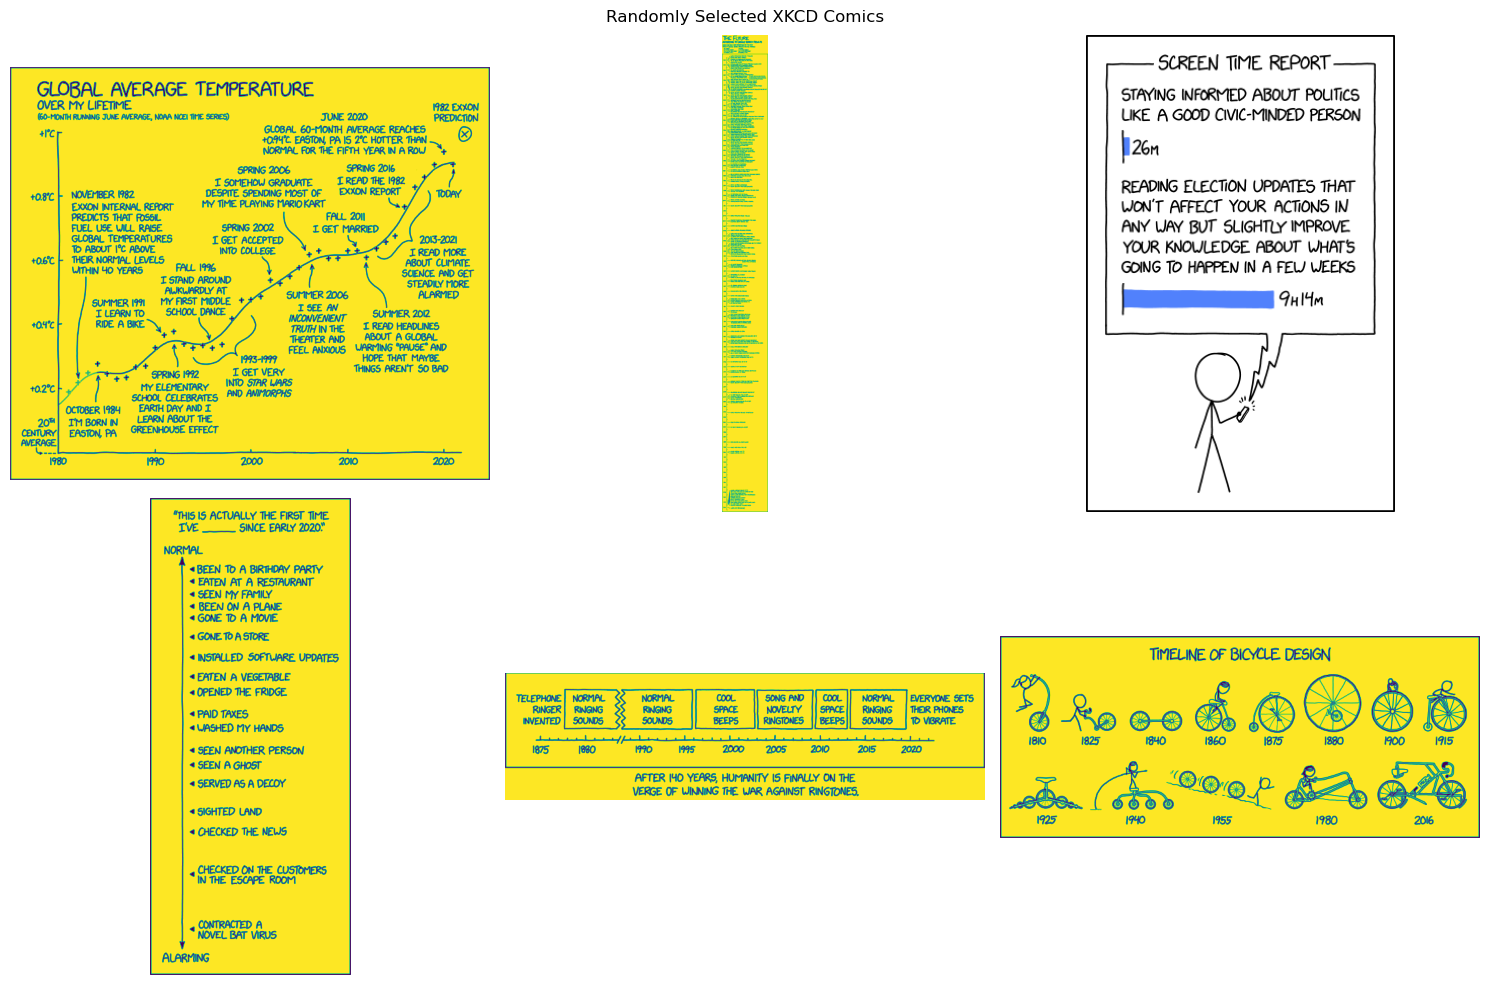

In [244]:
explore_comics(samples, "time")

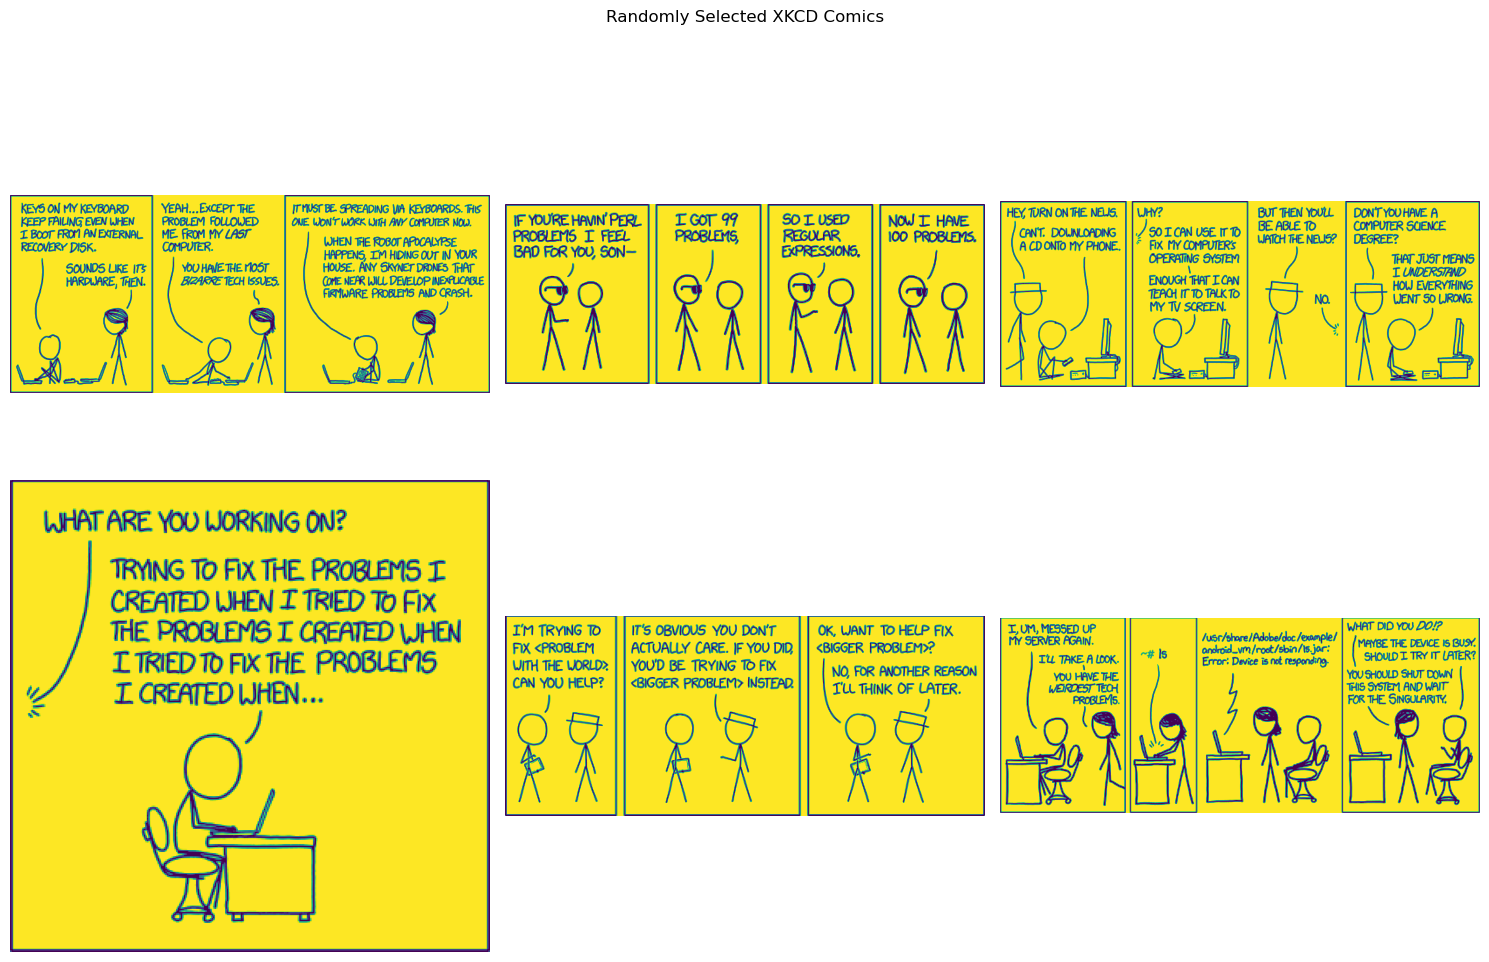

In [246]:
explore_comics(samples, "problem")

# find related comics and create a story

In [216]:
!pip install pysummarization

In [231]:
def filter_and_summarize_comics(samples, keyword):
    from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
    from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
    from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

    df = pd.DataFrame(samples)
    # Use boolean indexing to filter rows where the 'title' column contains the keyword
    filtered_df = df[df['title'].str.contains(keyword, case=False)]
    
    # Combine all the transcripts into a single string
    combined_transcripts = ' '.join(filtered_df['explanation'].dropna())
    text_to_summarize = combined_transcripts
    
    document = text_to_summarize
    # Object of automatic summarization.
    auto_abstractor = AutoAbstractor()
    # Set tokenizer.
    auto_abstractor.tokenizable_doc = SimpleTokenizer()
    # Set delimiter for making a list of sentence.
    auto_abstractor.delimiter_list = [".", "\n"]
    # Object of abstracting and filtering document.
    abstractable_doc = TopNRankAbstractor()
    # Summarize document.
    result_dict = auto_abstractor.summarize(document, abstractable_doc)

    return(result_dict["summarize_result"])

In [232]:
filter_and_summarize_comics(samples, "Race")

['This image parodies "WWJD" bracelets, which is an acronym for "What Would Jesus Do?".\n',
 ' Christians (primarily) wear such bracelets (or other "WWJD" paraphernalia) as a reminder to act in a way that Jesus would act, which presumably is the "Christian" way to act.\n',
 " It is not entirely clear, but this particular bracelet appears to be the rubber type most famously popularized by the yellow ones of cyclist Lance Armstrong's Livestrong charity, which later became a popular fad for all sorts of charitable and non-charitable causes.\n",
 'In this comic, the "J" has been replaced by an "E" for M.\n',
 ' Escher , a Dutch graphic artist (1898–1972) best known for art containing imagery that would be impossible in the real world (often referred to as impossible constructions or optical illusions).\n',
 "In keeping with Escher's art, the WWED bracelet has a single half-twist in it, creating what is known as a Mobius strip .\n",
 ' Although this is not an impossible construction, it is 

In [233]:
filter_and_summarize_comics(samples, "barrel")

["The comic shows a young boy floating in a barrel in an ocean that doesn't have a visible end.\n",
 ' It comments on the unlikely optimism and perhaps naïveté people sometimes display.\n',
 ' The boy is completely lost and seems hopelessly alone, without any plan or control of the situation.\n',
 ' Yet, rather than afraid or worried, he is instead quietly curious: "I wonder where I\'ll float next?"  Although not necessarily the situation in this comic, this is a behavior people often exhibit when there is nothing they can do about a problematic situation for a long time; they may have given up hope or developed a cavalier attitude as a coping mechanism.\n',
 'The title text expands on the philosophical content, with the boy representing the average human being: wandering through life with no real plan, quietly optimistic, always opportunistic and clueless as to what the future may hold.\n',
 '[A boy sits in a barrel which is floating in an ocean.\n',
 ' A boy in a floating barrel is n

['This image parodies "WWJD" bracelets, which is an acronym for "What Would Jesus Do?".\n', ' Christians (primarily) wear such bracelets (or other "WWJD" paraphernalia) as a reminder to act in a way that Jesus would act, which presumably is the "Christian" way to act.\n', " It is not entirely clear, but this particular bracelet appears to be the rubber type most famously popularized by the yellow ones of cyclist Lance Armstrong's Livestrong charity, which later became a popular fad for all sorts of charitable and non-charitable causes.\n", 'In this comic, the "J" has been replaced by an "E" for M.\n', ' Escher , a Dutch graphic artist (1898–1972) best known for art containing imagery that would be impossible in the real world (often referred to as impossible constructions or optical illusions).\n', "In keeping with Escher's art, the WWED bracelet has a single half-twist in it, creating what is known as a Mobius strip .\n", ' Although this is not an impossible construction, it is still 

['[Megan sits at a desk, using a computer, refreshing the page.\n', '] *Refresh* Click [She sits back and looks at the monitor.\n', '] *Refresh* Click [She sits back and looks at the monitor.\n', '] Click [A hole opens up in the panel.\n', ' It appears to be the torn paper of the comic itself.\n', ' Megan jumps in surprise, nearly tipping over her chair.\n', '] [Megan stands up as the chair falls over completely.\n', '] [By now, Megan is entirely inside the hole.\n', '] [The hole is closed, revealing a formation of ripped paper.\n', '] [Large frame, where Megan appears to be in space, with blue not black background.\n']
